# Data Exploration Quarterly Reports

This notebook will explore sources for quarterly reports and economic data. It will also look at neccessary data cleaning methods related to that.

In [2]:
# load the lib
import sys
sys.path.insert(1, '..')
from importlib import reload
import recommender as rcmd
rcmd = reload(rcmd)

## Quarterly Report Data

We have two possible APIs that support this kind of data: IexCloud and FinancialModelingPrep. Both are implemented through an abstraction layer in the recommender module (`rcmd.stocks.Statement`), but we will focus on FinancialModelingPrep here (IexCloud requires payments).

In [71]:
import requests
import pandas as pd
res = requests.get('https://financialmodelingprep.com/api/v3/company/profile/AAPL')
pd.DataFrame(res.json())

,profile,symbol
beta,1.139593,AAPL
ceo,Timothy D. Cook,AAPL
changes,0.49,AAPL
changesPercentage,(+0.22%),AAPL
companyName,Apple Inc.,AAPL
description,"Apple Inc is designs, manufactures and markets...",AAPL
exchange,Nasdaq Global Select,AAPL
image,https://financialmodelingprep.com/images-New-j...,AAPL
industry,Computer Hardware,AAPL
lastDiv,2.92,AAPL


In [126]:
import itertools
res = requests.get('https://financialmodelingprep.com/api/v3/financial-ratios/AAPL')
#res.json().keys()
#pd.DataFrame()
ratios = res.json()['ratios']
items = {}
dates = []
for rat in ratios:
    dates.append(rat.pop('date'))
    for key in rat:
        if key in items:
            items[key].append(rat[key])
        else:
            items[key] = [rat[key]]
            
for key in items:
    items[key] = pd.DataFrame(items[key]).assign(date=dates).set_index('date')
items['cashFlowIndicatorRatios']

,capitalExpenditureCoverageRatios,cashFlowCoverageRatios,cashPerShare,dividendPayoutRatio,dividendpaidAndCapexCoverageRatios,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payoutRatio,receivablesTurnover,shortTermCoverageRatios
date,,,,,,,,,,,,
2018-09-29,5.8164200405619,0.67637989919901,5.2293,0.2303337756799,2.8652728954672,0.8280729395356,12.94,15.6263,0.29154916319961,0.226,6.2738,3.7321187584345
2017-09-30,5.1582202232752,0.55519536652835,3.8888,0.26408967756613,2.5465900079302,0.80613468275594,9.924,12.3101,0.28017222576058,0.259,7.0564,3.476695718075
2016-09-24,5.2011151248626,0.76099595551062,3.7442,0.26593998292731,2.6615897765633,0.80773353867524,9.779,12.1062,0.30713831913522,0.261,7.2311,5.7071090047393
2015-09-26,7.0739902506964,1.2633068026365,3.6709,0.21652245570663,3.5257928760467,0.85863706839269,12.128,14.1248,0.34771409622831,0.213,8.1205,7.3884898627148
2014-09-27,6.0850912055437,1.6918260376824,2.2749,0.28159959503923,2.8517598739195,0.83566392577831,8.2,9.8122,0.32666648431303,0.279,7.6387,9.4662333544705
2013-09-28,5.9129572498898,3.1642688679245,2.2014,0.28522828522829,2.7324847250509,0.83087988670667,6.884,8.2852,0.3140015212685,0.285,8.6904,
2012-09-29,5.409061901723,,1.6422,0.059617089593367,4.2772077375946,0.81512505899009,6.335,7.7717,0.32494185600736,0.059,10.2935,
2011-09-24,5.0360976918948,,1.517,-0,5.0360976918948,0.80143355804844,4.649,5.8006,0.34669142440115,0.0,10.0041,
2010-09-25,8.7670909948138,,1.7689,-0,8.7670909948138,0.88593707986018,2.588,2.9209,0.28509007282484,0.0,8.7077,


In [128]:
res = requests.get('https://financialmodelingprep.com/api/v3/enterprise-value/AAPL')
pd.DataFrame(res.json()['enterpriseValues'])

,+ Total Debt,- Cash & Cash Equivalents,Enterprise Value,Market Capitalization,Number of Shares,Stock Price,date
0,1.144830e+11,2.591300e+10,1.211782e+12,1.123212e+12,5000109000.0,224.6375,2018-09-29
1,1.156800e+11,2.028900e+10,8.819395e+11,7.865485e+11,5251692000.0,149.7705,2017-09-30
2,8.703200e+10,2.048400e+10,6.606339e+11,5.940859e+11,5500281000.0,108.0101,2016-09-24
3,6.432800e+10,2.112000e+10,6.534319e+11,6.102239e+11,5793069000.0,105.3369,2015-09-26
4,3.529500e+10,1.384400e+10,5.860187e+11,5.645677e+11,6122663000.0,92.2095,2014-09-27


### Data Normalization

The next important step is to normalize the data. We will use a pre-defiend set of statements for that and create a new set of statement data based on a rolling window that incorporates previous data and relevant assets.

The analysis we apply in this book are based on principles described by Peter Lynch in his book "One up on Wall-Street". This includes the following relevant information from the company statements:

* p/e (price to earnings) ratio
* net-cash growth rate (compared to previous year/quarter)
* Ratio of Long-Term Debt Reduction
* Ratio of Net Cash to Long-Term Debt
* Ratio of outstanding Share Growth (i.e. rate of stock buyback)
* positive cash (net cash minus debt) per Share ratio to the current stock price
* Growth Rate + Dividends per p/e ratio

TODO: additional calculations based on adjusted p/e ratios

All these values are normalized as growth rates or w.r.t. to the current stock price (and number of shares), making it easy to use them as features for a classifier/regressor

In [ ]:
# TODO: load statements

## World Bank Data

In [29]:
import wbdata
import pandas as pd
%matplotlib inline

In [7]:
# simple search for data
wbdata.search_countries(query="Germany")
wbdata.search_indicators(query="Germany")

DEU	Germany
5.1.4_AFG.TOTA.AID.DEU	International aid disbursed to total education, Germany to Afghanistan (USD million)
5.1.4_LAO.TOTA.AID.DEU	 International aid disbursed to total education, Germany (GIZ and KfW) to Laos (USD million)  
5.1.6_MOZ.TOTA.AID.DEU	 International aid disbursed to total education, Germany (GIZ and KfW) to Mozambique (USD million) 
5.2.4_AFG.BAS.AID.DEU 	International aid disbursed to basic education, Germany to Afghanistan (USD million)
5.2.4_LAO.BAS.AID.DEU 	 International aid disbursed to basic education, Germany (GIZ and KfW) to Laos (USD million)  
DC.DAC.DEUL.CD        	Net bilateral aid flows from DAC donors, Germany (current US$)


In [20]:
ds = wbdata.get_source(display=False)
pd.DataFrame(ds).set_index('id')[['name']].sample(10)

,name
id,
41,Country Partnership Strategy for India (FY2013...
27,Global Economic Prospects
11,Africa Development Indicators
30,Exporter Dynamics Database ��� Indicators at C...
43,Adjusted Net Savings
62,International Comparison Program (ICP) 2011
22,Quarterly External Debt Statistics SDDS
18,IDA Results Measurement System
67,PEFA 2011


In [65]:
ds = wbdata.search_indicators('GDP per capita', display=False)
pd.DataFrame(ds).sample(10)

,id,name,source,sourceNote,sourceOrganization,topics
17,UIS.XUNIT.GDPCAP.1.FSHH,Initial household funding per primary student ...,"{'value': 'Education Statistics', 'id': '12'}",,,[]
4,NY.GDP.PCAP.CN,GDP per capita (current LCU),"{'value': 'World Development Indicators', 'id'...",GDP per capita is gross domestic product divid...,"World Bank national accounts data, and OECD Na...","[{'value': 'Economy & Growth', 'id': '3'}]"
16,UIS.XUNIT.GDPCAP.1.FSGOV,Initial government funding per primary student...,"{'value': 'Education Statistics', 'id': '12'}",,,[]
21,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,"{'value': 'Education Statistics', 'id': '12'}","Average total (current, capital and transfers)...",UNESCO Institute for Statistics,[]
1,FB.DPT.INSU.PC.ZS,Deposit insurance coverage (% of GDP per capita),"{'value': 'WDI Database Archives', 'id': '57'}",,,[]
3,NY.GDP.PCAP.CD,GDP per capita (current US$),"{'value': 'World Development Indicators', 'id'...",GDP per capita is gross domestic product divid...,"World Bank national accounts data, and OECD Na...","[{'value': 'Economy & Growth', 'id': '3'}]"
18,UIS.XUNIT.GDPCAP.2.FSGOV,Initial government funding per lower secondary...,"{'value': 'Education Statistics', 'id': '12'}","Average total (current, capital and transfers)...",UNESCO Institute for Statistics,[]
22,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,"{'value': 'Education Statistics', 'id': '12'}",,,[]
8,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)","{'value': 'World Development Indicators', 'id'...",GDP per capita based on purchasing power parit...,"World Bank, International Comparison Program d...","[{'value': 'Economy & Growth', 'id': '3'}]"
23,UIS.XUNIT.GDPCAP.5T8.FSHH,Initial household funding per tertiary student...,"{'value': 'Education Statistics', 'id': '12'}",,,[]


In [22]:
inds = wbdata.get_indicator(source=59, display=False)
pd.DataFrame(inds).sample(10)

,id,name,source,sourceNote,sourceOrganization,topics
0,NW.HCA.PC,Human capital per capita (constant 2014 US$),"{'value': 'Wealth Accounts', 'id': '59'}",Human capital is computed as the present value...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
6,NW.NCA.FNTI.PC,"Natural capital per capita, forests: nontimber...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
34,NW.NCA.PASL.PC,"Natural capital per capita, agricultural land:...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
5,NW.NCA.CROL.TO,"Natural capital, agricultural land: cropland (...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
24,NW.NCA.MNIC.PC,"Natural capital per capita, subsoil assets, mi...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
41,NW.NCA.SAGA.PC,"Natural capital per capita, subsoil assets: ga...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
45,NW.NCA.SSOI.PC,"Natural capital per capita, subsoil assets (co...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
3,NW.NCA.AGRI.TO,"Natural capital, agricultural land (constant 2...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
2,NW.NCA.AGRI.PC,"Natural capital per capita, agricultural land ...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]
31,NW.NCA.MTIN.TO,"Natural capital, subsoil assets, minerals: tin...","{'value': 'Wealth Accounts', 'id': '59'}",Natural capital includes the valuation of foss...,"Lange, G.M., Q. Wodon, and K. Carey, editors, ...",[]


In [63]:
wbdata.search_countries("India")

IND	India


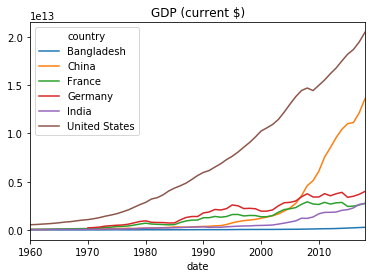

In [68]:
# retrieve the GDP in current $ for various countries as pandas
cntr = ['USA', 'DEU', 'FRA', 'CHN', 'BGD', 'IND']
nw = wbdata.get_data("ny.gdp.mktp.cd", country=cntr, pandas=True)
nw = nw.reset_index().pivot('date', 'country', 'value')
nw.sort_index(ascending=True).plot(title='GDP (current $)');

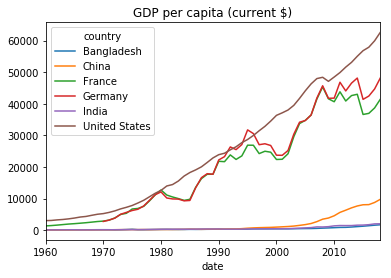

In [67]:
nw = wbdata.get_data("NY.GDP.PCAP.CD", country=cntr, pandas=True)
nw = nw.reset_index().pivot('date', 'country', 'value')
nw.sort_index(ascending=True).plot(title='GDP per capita (current $)');

In [132]:
df1 = pd.DataFrame({'foo': [1,2,3,4], 'bar': [1,2,3,4]})
df2 = pd.DataFrame({'baz': [5,6,7,8,9], 'foo': [1,2,3,4,5]})
pd.concat([df1, df2], axis=0, sort=True)

,bar,baz,foo
0,1.0,NaN,1
1,2.0,NaN,2
2,3.0,NaN,3
3,4.0,NaN,4
0,NaN,5.0,1
1,NaN,6.0,2
2,NaN,7.0,3
3,NaN,8.0,4
4,NaN,9.0,5
